In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
chamau_lag = pd.read_csv("datasets/Chamau_Preprocessed_2014-2024.csv")
chamau_daily = pd.read_csv("datasets/Chamau_Daily_2014-2024.csv")

In [4]:
chamau_A = chamau_lag[chamau_lag["Parcel"] == "A"].copy()
chamau_B = chamau_lag[chamau_lag["Parcel"] == "B"].copy()


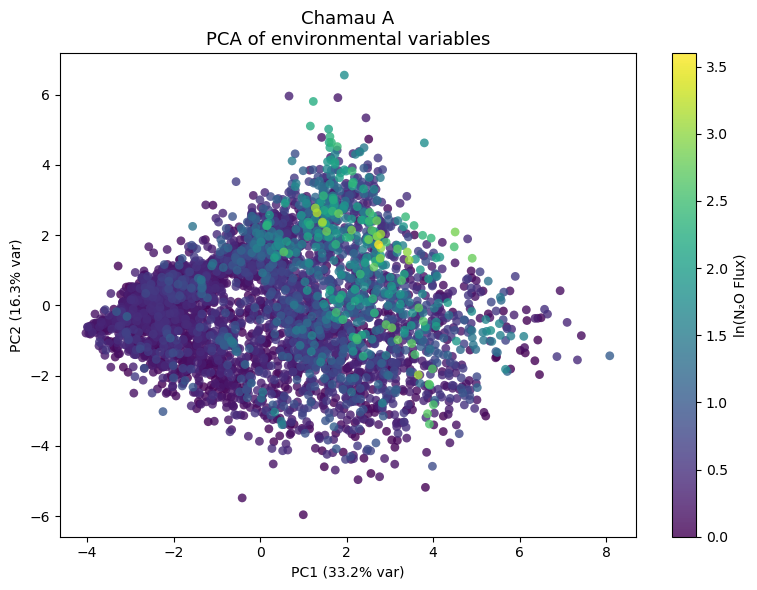

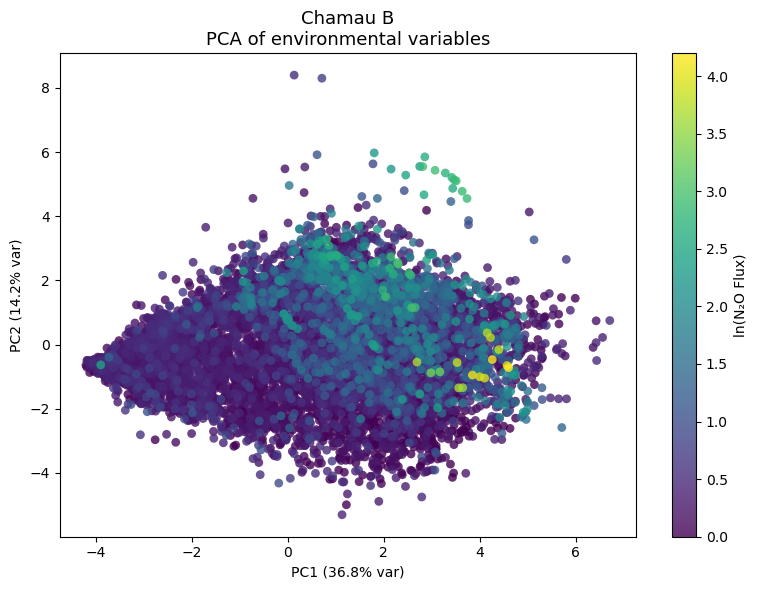

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm",
    "SoilTemp_4cm", "SoilTemp_15cm",
    "NEE", "GPP", "RECO",
    "Mowing", "FertilizerOrganic", "FertilizerMineral",
    "Grazing", "SoilCultivation"
]

def plot_pca(df, title):
    # Drop rows with missing values in required columns
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()
    
    # Standardize variables
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])
    
    # Run PCA
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(X_scaled)
    df_clean["PC1"] = pcs[:, 0]
    df_clean["PC2"] = pcs[:, 1]

    # Sort by N2O_Flux (so larger appear on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["PC1"], df_clean["PC2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    # Labels and aesthetics
    ax.set_title(f"{title}\nPCA of environmental variables", fontsize=13)
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for chamau_A and chamau_B
# =============================================
plot_pca(chamau_A, "Chamau A")
plot_pca(chamau_B, "Chamau B")


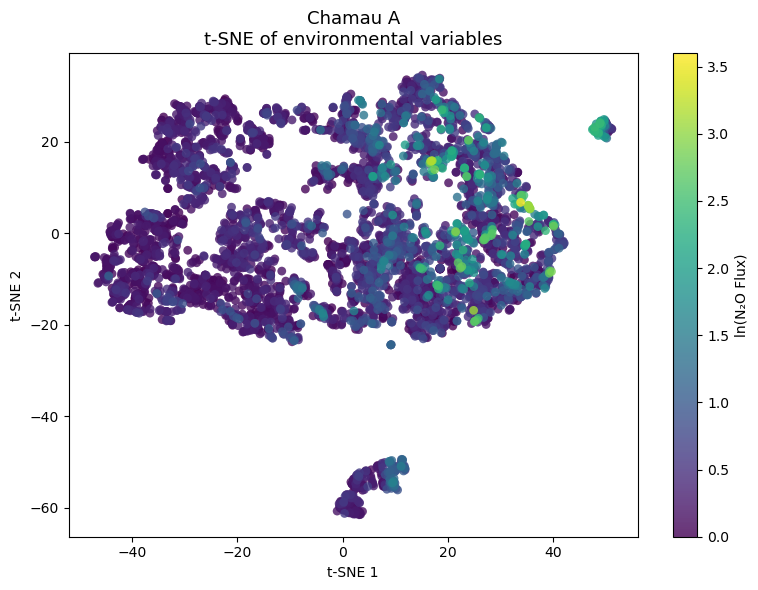

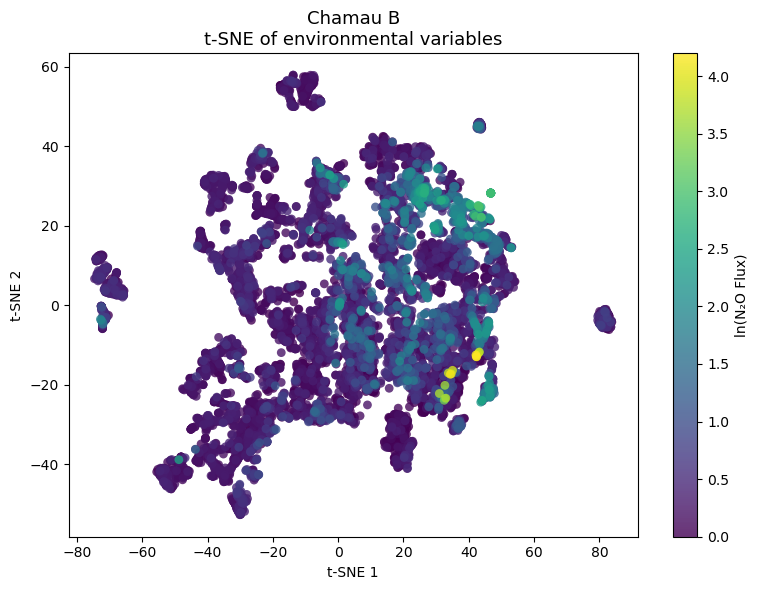

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm",
    "SoilTemp_4cm", "SoilTemp_15cm",
    "NEE", "GPP", "RECO",
    "Mowing", "FertilizerOrganic", "FertilizerMineral",
    "Grazing", "SoilCultivation"
]

def plot_tsne(df, title, perplexity=100, learning_rate=200, random_state=42):
    # Drop missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize features
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        init="pca",
        random_state=random_state
    )
    tsne_results = tsne.fit_transform(X_scaled)

    df_clean["tSNE1"] = tsne_results[:, 0]
    df_clean["tSNE2"] = tsne_results[:, 1]

    # Sort by N2O_Flux for plotting order
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["tSNE1"], df_clean["tSNE2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    ax.set_title(f"{title}\nt-SNE of environmental variables", fontsize=13)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for chamau_A and chamau_B
# =============================================
plot_tsne(chamau_A, "Chamau A")
plot_tsne(chamau_B, "Chamau B")


/home/anding/miniconda3/envs/dsl/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


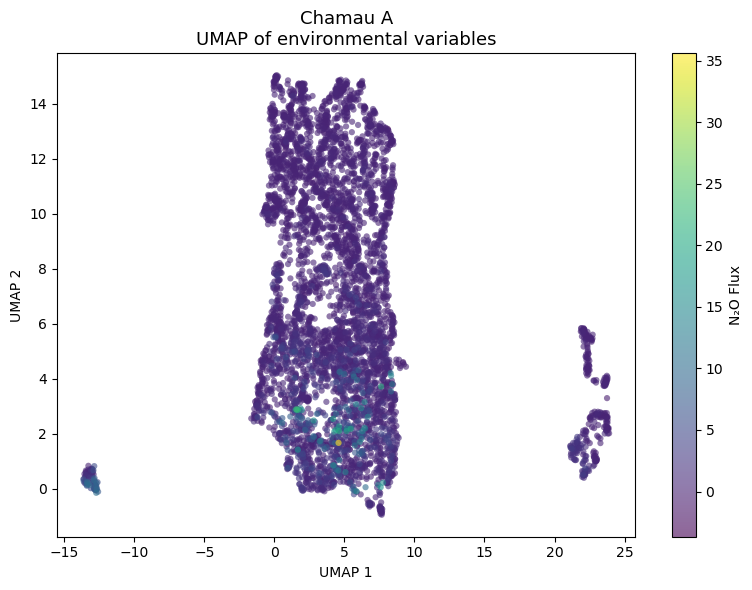

/home/anding/miniconda3/envs/dsl/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


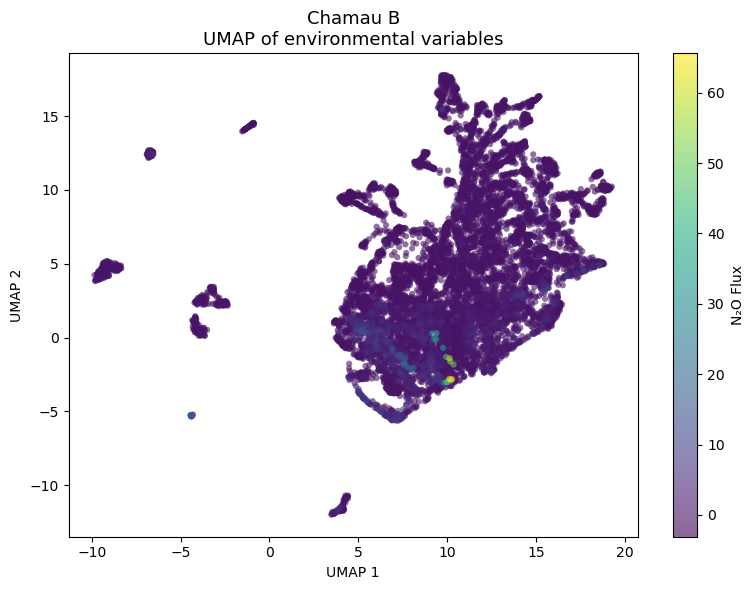

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm",
    "SoilTemp_4cm", "SoilTemp_15cm",
    "NEE", "GPP", "RECO",
    "Mowing", "FertilizerOrganic", "FertilizerMineral",
    "Grazing", "SoilCultivation"
]

def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("N₂O Flux")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for chamau_A and chamau_B
# =============================================
plot_umap(chamau_A, "Chamau A")
plot_umap(chamau_B, "Chamau B")
